### Lab3 Assignment - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset
#### Using Machine Learning Workflow



Importing packages...

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

##### **1. Frame the problem and look at the big picture:**

- Need to perform univariate linear regression on the Scikit-Learn Diabetes dataset.
- Identify the independent variable "bmi" and the dependent variable "diabetes_y".
- Goal: Fit a linear regression model to predict diabetes progression based on BMI.

---

##### **2. Get the data:**

- Load the diabetes dataset using Scikit-Learn's datasets.load_diabetes().

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_dataframe = pd.DataFrame(
    data=diabetes_X, columns=datasets.load_diabetes().feature_names)
diabetes_dataframe['Target'] = diabetes_y

diabetes_dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


--- 
##### **3. Explore the data:**

- Conduct basic data exploration to understand the dataset.
- Create 1-3 graphs to visualize the relationship between bmi and diabetes_y.

**Describing dataset**


In [3]:
diabetes_dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
diabetes_dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Graph to visualize the relationship between BMI and Diabetes_Y**

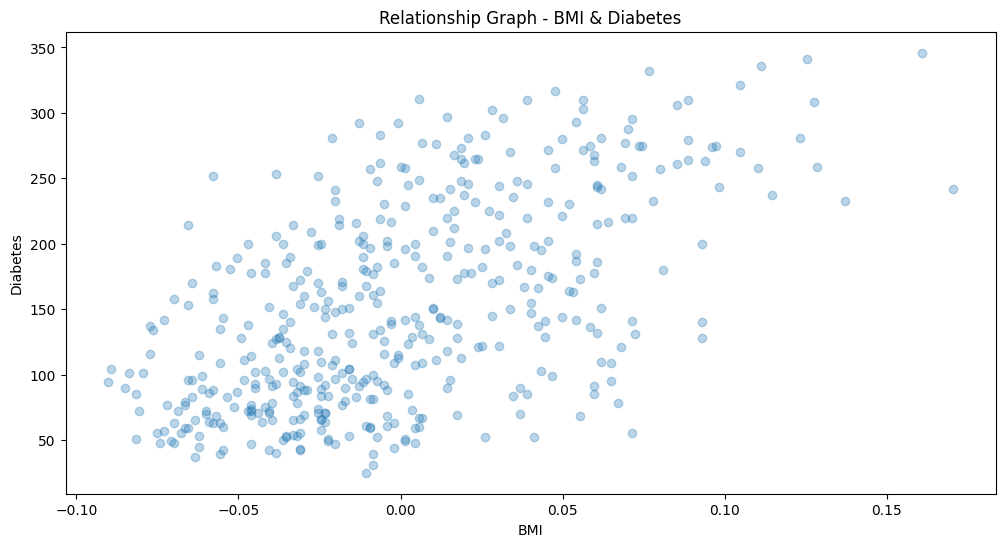

In [6]:
plt.figure(figsize=(12, 6))
plt.title('Relationship Graph - BMI & Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.scatter(diabetes_dataframe['bmi'], diabetes_dataframe['Target'], alpha=0.3)
plt.show()

---
##### **4. Prepare the data:**

- Since this is a univariate regression, we do not need extensive data preprocessing.
- Data split between training and test sets for model evaluation.

In [7]:
bmi_feature = diabetes_X[:, np.newaxis, 2]
bmi_feature

X_train, X_test, y_train, y_test = train_test_split(
    bmi_feature, diabetes_y, test_size=0.2, random_state=0)

---
##### **5. Short-list promising models:**
Using Linear Regression model

---
##### **6. Fine-Tune the System:**

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

---
##### **7. Present your solution:**

Calculated coefficients

In [9]:
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

Slope:  [981.65543614]
Intercept:  152.28824927379569


In [10]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Loss on train 

In [11]:
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)

print("MSE on Training: ", mse_train)
print("MSE on Testing: ", mse_test)

MSE on Training:  3827.8186984113813
MSE on Testing:  4150.680189329985


Graph

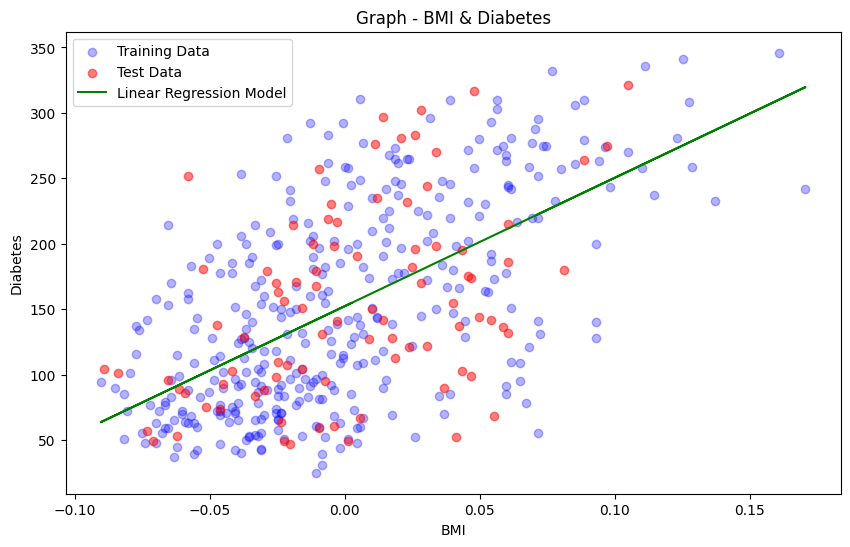

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Graph - BMI & Diabetes')
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test Data')
plt.plot(X_train, y_train_predict, color='green',
         label='Linear Regression Model')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.legend()
plt.show()

---
##### **Take aways**

- Loss:
     Train MSE: 3827.82 , Test MSE: 4150.68  
     - The model is having high values, thus the performance will be poor.



- Moderate Correlation:
The correlation between BMI and Diabetes is relatively weak. 